<a href="https://colab.research.google.com/github/Dwn96/ImageClassifierCNNModel/blob/master/DigitalImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset


In [16]:
from tensorflow.keras.datasets import mnist


In [56]:
#Loads the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [57]:
#Display the number of samples in the x_train, x_test, y_train and y_test
print("Initial shape of dimensions of x_train", str(x_train.shape) + "\n")
print("Number of samples in our training data: " + str(len(x_train)))
print("Number of labels in our training data: " + str(len(y_train)))
print("Number of samples in our test data: " + str(len(x_test)))
print("Number of labels in our test data: " + str(len(y_test)) + "\n")

print("Dimensions of the x_train: " + str(x_train[0].shape))
print("Labels in y_train: " + str(y_train.shape))

print("Dimensions of the x_train: " + str(x_test[0].shape))
print("Labels in y_train: " + str(y_test.shape))

Initial shape of dimensions of x_train (60000, 28, 28)

Number of samples in our training data: 60000
Number of labels in our training data: 60000
Number of samples in our test data: 10000
Number of labels in our test data: 10000

Dimensions of the x_train: (28, 28)
Labels in y_train: (60000,)
Dimensions of the x_train: (28, 28)
Labels in y_train: (10000,)


Take a look at the images

In [58]:
import matplotlib.pyplot as plt
import numpy as np


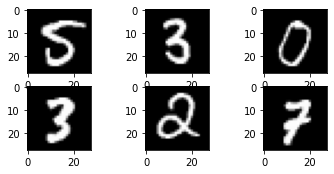

In [59]:
#Plot 6 images in subplots
#set the colormap to grey since our image data is in greyscale
plt.subplot(331)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(332)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(333)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(334)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(335)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

plt.subplot(336)
random_num = np.random.randint(0, len(x_train))
_=plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

In [60]:
#store the number of rows and columns
img_rows = x_train[0].shape[0]
img_columns = x_train[0].shape[1]

#get the data into the right shape for keras
#add 4th dimension to the tensor
x_train = x_train.reshape(x_train.shape[0], img_rows, img_columns, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1)

In [61]:
#store the shape of a single image for future use
input_shape= (img_rows, img_columns, 1)

#change the image type to float32 from unsignedint
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalzie the data by changing the range from 0-255 to 0-1
x_train /=255.0
x_test /=255.0

print("X_train shape ", x_train.shape)
print(x_train.shape[0], "x_train samples")
print(x_test.shape[0], "x_test samples")


X_train shape  (60000, 28, 28, 1)
60000 x_train samples
10000 x_test samples


In [62]:
from tensorflow.keras.utils import to_categorical
#one-hot encode for outputs
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)

#count the number of columns in our hot coded matrix
print('Number of classes: '+str(y_test.shape[1]))
num_classes=y_test.shape[1]

Number of classes: 10


In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD

#create a model
model=Sequential()

#First Convolutional layer, filter size 32, which reduces our layer size to 28*28*32
#we use ReLU activation and specify our input shape which is 28*28*1
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))

#second Convolutional layer, filter size 64, which reduces layer size to 24*24*64
model.add(Conv2D(64, (3,3),activation='relu'))

#we use maxpooling with kernel size of 2*2, which reduces size to 12*12*64
model.add(MaxPooling2D(pool_size=(2,2)))

#Dropout P setting as 0.25 to reduce overfitting
model.add(Dropout(0.25))

#We then flatten our tensor object before input into our dense layer
#A flatten operation on a tensor reshapes the tensor to have a shape that is
#equal to the number of elements combined in tensor
#in our CNN it goes from  12*12*64 to 9216*1
model.add(Flatten())

#We use another dropout layer
model.add(Dropout(0.5))

#We create fully connected/Dense layer with an output of each class (10)
model.add(Dense(num_classes, activation='softmax'))

#we compile our model, this creates an object that stores the model. We set the 
#Optimizer to use stochastic Gradient Descent (learning rate of 0.01)
#We set the loss function to be categorical_crossentropy as its suitable for
#multiclass problems. And finally the  metrics (to judge the performance of the model) we use accuracy
model.compile(loss='categorical_crossentropy', optimizer=SGD(0.01), metrics=['accuracy'])

#the summary function can be used to display the model layers and parameters
print(model.summary)

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7fba2abbfba8>>


In [64]:
batch_size=32
epochs=10

#store the results for later plotting
#in our fit function we specify  our dataset (x_train and y_train)
#batch size (typically 16 to 128 -- RAM). The number of epochs (10 to 100)
#validation dataset (x_test, y_test)
#verbose = 1, setting the  training to output performance metrics every epoch

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

#We then obtain the accuracy score
score =model.evaluate(x_test, y_test, verbose=0)
print("test loss: ", score[0])
print("Test accuracy", score[1])

Epoch 1/10
 246/1875 [==>...........................] - ETA: 2:04 - loss: 1.3585 - accuracy: 0.5882

KeyboardInterrupt: ignored

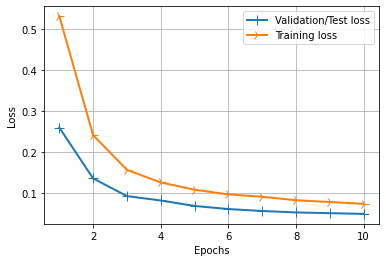

In [65]:
#Plotting the loss charts
#Use the history object to get our svaed performace results
history_dict=history.history

#extract the loss and the validation losses
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']

#get the number of epochs and create an array up to that number using range()
epochs=range(1, len(loss_values) +1)

#Plot line charts for both validation and loss
line1 = plt.plot(epochs, val_loss_values, label='Validation/Test loss')
line2 = plt.plot(epochs, loss_values, label='Training loss')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

Plot of the Accuracy

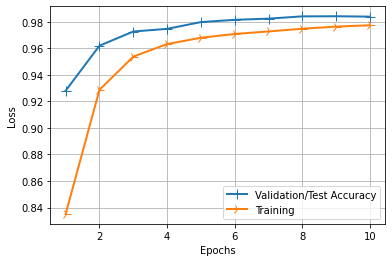

In [66]:
#Plotting the accuracy chart
import matplotlib.pyplot as plt

#Use the history object to get our svaed performace results
history_dict=history.history

#extract the loss and the validation losses
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']

#get the number of epochs and create an array up to that number using range()
epochs=range(1, len(acc_values) +1)

#Plot line charts for both validation and loss
line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training')
plt.setp(line1, linewidth=2.0, marker='+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

In [67]:
#saving the model
model.save('mnist_simple_cnn_10_Epochs.h5')
print('model is saved')

model is saved


In [68]:
from tensorflow.keras.models import load_model
classifier=load_model('mnist_simple_cnn_10_Epochs.h5')

5
5
7
8
9


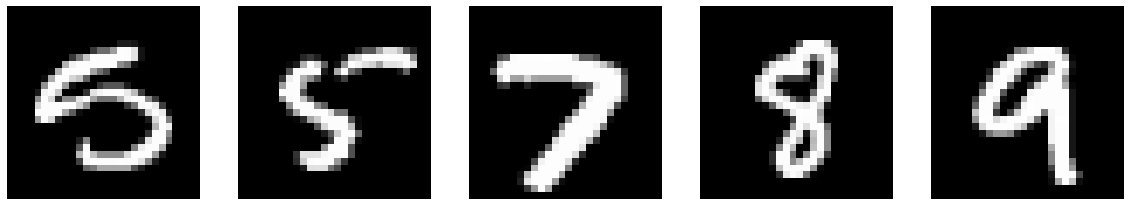

In [69]:
import numpy as np
figure=plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  random_idx=np.random.randint(0,len(x_test))
  plt.imshow(x_test[random_idx,:,:,0],cmap='gray')
  plt.axis('off')
  print(np.squeeze(np.argmax(model.predict(x_test[random_idx].reshape(1,28,28,1)), axis=1),axis=0))

**Visualitazion of the Convolutional Neural Network**

Objective: Load trained CNN and understand what they "See" or learn, this well help in better understanding how they work.

Workflow:
1. Load dataset from milestone 1

2. Analyze the model's perfomance by viewing Confusion matrix and Classification Report. Aim at identifying weaknesses of the model.
Look at individual perfomance of each class of the CNN and see cases where it has trouble classifying the data correctly.

3. Identify all samples wrongly classified by the CNN and display the results. Think  why the model got it wrong.

4. Extract our layer outputs and create our activation model. So that we can visualize the activation of each layer. Give model some input and see how it deals with it.

5. Display output shape of the first activation layer and compare it with the output layer shape that can be seen from the model summary.

6. Show the output of the activation map of the first convolution layer and compare it with the output layer shape that can be seen from the model summary.

7. Display all the activations for the first 3 layers of the model.


Output: Display of the classification report and confusion matrix. A display of the sample data that is wrongly classified. We then display the activation layer for various CNN layers.


In [78]:
#Reload the data
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

In [79]:
#Load datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
model=load_model('mnist_simple_cnn_10_Epochs.h5')

In [80]:
#Number of rows and cols
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

In [81]:
#get data in the right shape for keras
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [82]:
#store the shape of a single image
input_shape=(img_rows,img_cols,1)

#Change the image type to float32 data type
x_test=x_test.astype('float32')

#Normalize the data by changing the ranges from 0-255
x_test/=255.0
y_test=to_categorical(y_test)
print(x_test.shape[0],'test samples')

10000 test samples


In [86]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred=model.predict_classes(x_test)

print(classification_report(np.argmax(y_test,axis=1),y_pred))
print(confusion_matrix(np.argmax(y_test,axis=1),y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       980
           1       0.96      0.93      0.95      1135
           2       0.89      0.86      0.87      1032
           3       0.88      0.86      0.87      1010
           4       0.88      0.88      0.88       982
           5       0.82      0.79      0.81       892
           6       0.89      0.92      0.91       958
           7       0.90      0.88      0.89      1028
           8       0.73      0.89      0.80       974
           9       0.89      0.81      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

[[ 920    0    7    8    0   10   13    1   21    0]
 [   0 1057    4    5    1    6    6    0   56    0]
 [   5    1  887   16   15    5   32   19   51    1]
 [   3    1   19  869    0   45    5   22   40    6]
 [   1    5    6    0  866   

In [87]:
#Getting misclassified data

import cv2
import numpy as np
from tensorflow.keras.datasets import mnist

#Load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [93]:
#use numpy to create an array to store a value of 1 when a misclassification occurs

result=np.absolute(y_test -y_pred)
result_indices=np.nonzero(result>0)
                          
#display the indices of the missclassificiiton
print('Indices of missclassified data are: \n\n'+ str(result_indices))

Indices of missclassified data are: 

(array([   8,   18,   33, ..., 9986, 9992, 9998]),)


In [102]:
#Reload the dataset

#Number of rows and cols
img_rows=x_train[0].shape[0]
img_columns=x_train[0].shape[1]


x_test = x_test.reshape(x_test.shape[0], img_rows, img_columns, 1)

#store the shape of a single image
input_shape = (img_rows,img_columns,1)

#change image type to float32
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#normalize the data by changing the range
x_test /= 255.0
y_test = to_categorical(y_test)
print(x_test.shape[0], 'test samples')

10000 test samples


Display misclassified item

6	5	6	3	8	

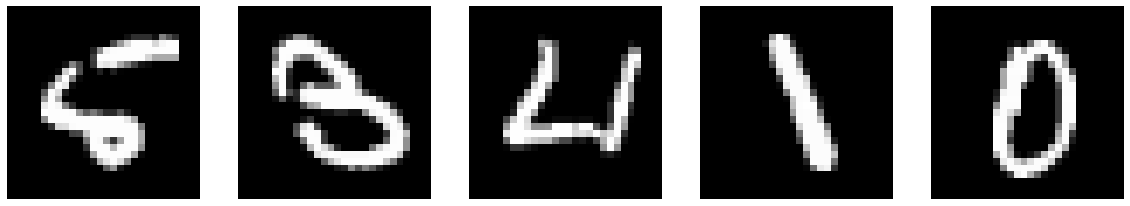

In [103]:
import matplotlib.pyplot as plt

figure= plt.figure(figsize=(20,20))
for i in range(5):
  figure.add_subplot(1,5,i+1)
  index=result_indices[0][i]
  plt.imshow(x_test[index,:,:,0],cmap='gray')
  plt.axis('off')
  prediction=np.squeeze(np.argmax(model.predict(x_test[index].reshape(1,28,28,1)),axis=1),axis=0)
  print(prediction, end='\t')

# Viewing the activation maps of the CNN

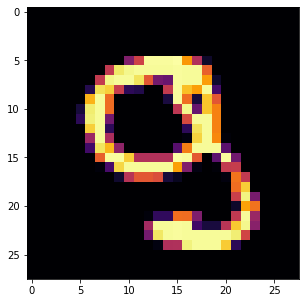

In [106]:
from tensorflow.keras.models import Model

#Extract the outputs of the top 7 layers
layer_outputs=[layer.output for layer in model.layers[:7]]

#create a model to return those outputs given the model's input
activation_model = Model(inputs=model.input,outputs= layer_outputs)

#display the test image of the activation model
img_tensor = x_test[151].reshape(1,28,28,1)
figure1 = plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap='inferno')
plt.axis='off'

In [98]:
import matplotlib.pyplot as plt
img_tensor=x_test[151].reshape(1,28,28,1)
figure=plt.figure(figsize=(5,5))
plt.imshow(img_tensor[0,:,:,0],cmap=='inferno')
plt.axis('off')

NameError: ignored

<Figure size 360x360 with 0 Axes>

# Running the model in predict mode to get the activation layer

When an image is fed to the model it returns the values of the layer activations im the original model.

In [107]:
activations=activation_model.predict(img_tensor)
print('Number of layer activation:'+ str(len(activations)) )

Number of layer activation:7


In [108]:
#activation of the first convolution layer for the input
first_layer_activation=activations[0]
print(first_layer_activation.shape)

(1, 26, 26, 32)


In [109]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

Output of the first activation layer can be seen to be of the same shape as the output of the first Convolution layer.
We then plot the 4th conv channel/filter of the activation of the 1st layer of the original model

[link text](https://)

# The output of the 4th conv filter in the 1st conv layer

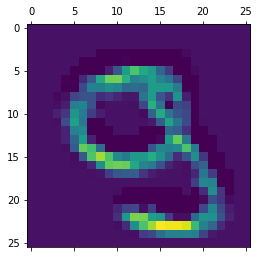

In [110]:
plt.matshow(first_layer_activation[0,:,:,3],cmap='viridis')

# A function that displays the activations of specific layers

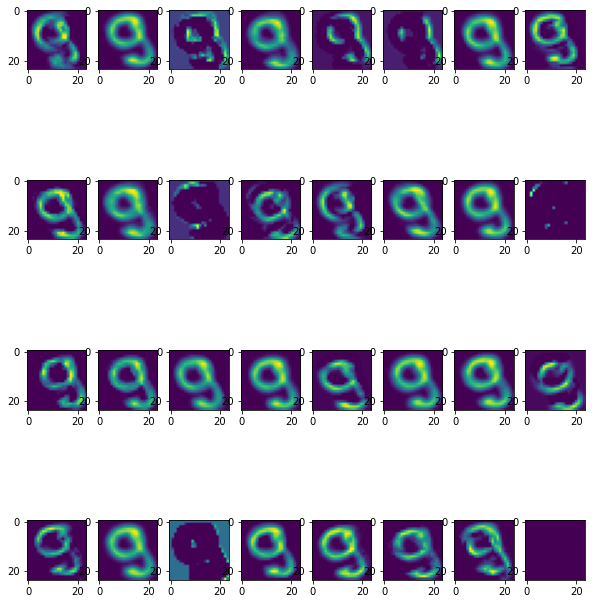

In [120]:
def display_activations(activations,col_size,row_size,act_index):
  activation = activations[act_index]
  activation_index = 0
  fig,ax = plt.subplots(row_size,col_size, figsize=(row_size*2.5,col_size*1.5))
  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(activation[0,:,:,activation_index],cmap = 'viridis')
      activation_index += 1

display_activations(activations,8,4,1)

# Transfer Learning: Understanding Transfer of Learning